# Exercise 1: Graph Making

Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![](exercise2.png)

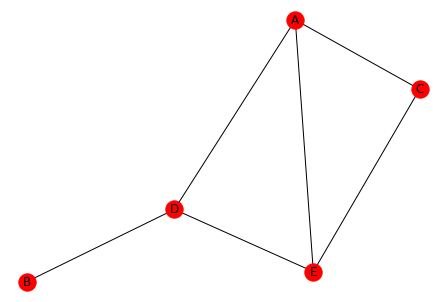

In [1]:
'''Exercise 1.1
Graph making

Input can be in the form of 
a dict or a list.

In running my function below, 
I used a list example.

'''

import networkx as nx

G1 = {
    'A' : ['C', 'D', 'E'],
    'B' : ['D'],
    'C' : ['A', 'C'],
    'D' : ['A', 'B', 'E'],
    'E' : ['A', 'C', 'D']
}

G2 = ([('E','D'), ('B','D'),('D','A'), ('A','E'), ('A','C'), ('C','E')])


def make_simple_graph(G):
    G = nx.Graph(G)
    nx.draw(G, with_labels=1, node_color='r')


make_simple_graph(G2)

## Exercise 1.2: computing diameter and node degrees of graphs

For the graph made by your function in the previous exercise, calculate the diameter and the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use a networkx function or method to compute the diameter or degrees. They have to be calculated yourself

```

compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}

In [2]:
'''Exercise 1.2
computing diameter and node degrees of graphs

Help from Michael!
'''

import networkx as nx

def compute_diameter_and_degrees(G):
    diameter = 0
    list_of_nodes = list(G)
    node = list_of_nodes[0]
    
    
    '''this dict will eventually be filled
    with the final diameter and degree info'''
    dd_info = {'diameter': 0}
    
    for node in list_of_nodes:
        solution = nx.shortest_path(G, node)
        
        
        for v in solution.values():
            if len(v) - 1 > diameter:
                diameter = len(v) - 1
        
        '''update the dd_info dict with diameter info'''
        dd_info['diameter'] = diameter
        
                
    degree_dict = {node: 0 for node in list_of_nodes}
    for node in list_of_nodes:
        solution = nx.shortest_path(G, node)
        for v in solution.values():
            if len(v) == 2:
                degree_dict[node] +=1
    
    
    '''crazy code I found that works to add degree_ to all key names'''
    idea = dict(('degree_' + k, m(v) if hasattr(v, 'keys') else v) for k,v in degree_dict.items())   
    
    
    '''update the dd_info dict with degree info'''
    dd_info.update(idea) 
    
    return dd_info

G3 = ([('E','D'), ('B','D'),('D','A'), ('A','E'), ('A','C'), ('C','E')])
G = nx.Graph(G3)

compute_diameter_and_degrees(G)
#output should be -> { 'diameter': 3, 'degree_A': 3, 'degree_B': 1, 'degree_C': 2, 'degree_D': 3, 'degree_E': 3, }

{'diameter': 3,
 'degree_E': 3,
 'degree_D': 3,
 'degree_B': 1,
 'degree_A': 3,
 'degree_C': 2}

In [ ]:
'''Exercise 1.2 Forbidden Version. Doesn't count.

I used this version as a guide
with the forbidden nx.diameter and G.degree methods

'''

def compute_diameter_and_degrees(G):
    
    a = nx.diameter(G)
    b = nx.center(G, e=None, usebounds=False)
        
    diameter_total = nx.diameter(G)
    dd_info = {'diameter': diameter_total}

    degree = dict(G.degree(list(G)))

    
    '''crazy code I found that works to add degree_ to all key names'''
    for k in degree:
        idea = dict(('degree_' + k, m(v) if hasattr(v, 'keys') else v) for k,v in degree.items())   
        dd_info.update(idea)
    
    return dd_info
    
G2 = ([('E','D'), ('B','D'),('D','A'), ('A','E'), ('A','C'), ('C','E')])
G = nx.Graph(G2)

compute_diameter_and_degrees(G)

# output should be -> { 'diameter': 3, 'degree_A': 3, 'degree_B': 1, 'degree_C': 2, 'degree_D': 3, 'degree_E': 3, }

## Exercise 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


In [3]:
routemap =  [
    ('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'),
    ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'),
    ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'),
    ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'),
    ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'),
    ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), 
    ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'),
    ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'),('San Francisco', 'Cleveland'), ('Seattle', 'Portland')
]

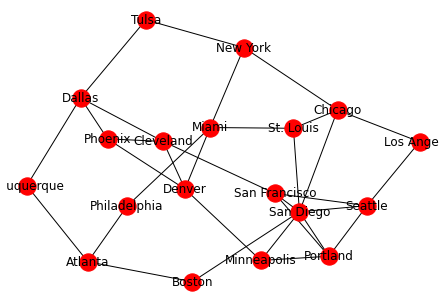

In [4]:
# For my info

R = nx.Graph(routemap)
nx.draw(R, with_labels=1, node_color='r')

In [5]:
# For my info
nx.eccentricity(R)

{'St. Louis': 4,
 'Miami': 3,
 'San Diego': 3,
 'Chicago': 4,
 'San Francisco': 4,
 'Minneapolis': 4,
 'Boston': 4,
 'Portland': 4,
 'Seattle': 4,
 'Tulsa': 4,
 'New York': 3,
 'Dallas': 4,
 'Phoenix': 4,
 'Cleveland': 3,
 'Denver': 4,
 'Los Angeles': 5,
 'Philadelphia': 4,
 'Atlanta': 4,
 'Albuquerque': 5}

In [6]:
'''
Exercise 1.3.1
What is the maximum number of hops that would ever be taken
by a passenger on a single trip between any two serviced cities?

'''

nx.diameter(R) # output should be 5

5

In [7]:
'''
Exercise 1.3.2
If you were a rich jet-setter traveling everywhere in across the country
and were constrained to fly CBDS, which city would be the most optimal place
for you to live, to minimize the number of hops you would have to make
on average as you jet from home to your latest vacation spot?

The output below makes sense,
since these 4 cities had
the smallest eccentricities
'''

nx.center(R, e=None, usebounds=False)

['Miami', 'San Diego', 'New York', 'Cleveland']

# Exercise 2

Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```

G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```


25

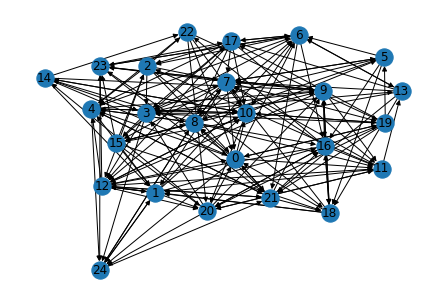

In [8]:
import networkx as nx

G = nx.binomial_graph(25, 0.3, directed=1)

'''
Info on binomial_graph:

binomial_graph(n, p, seed=None, directed=False)
Returns a 𝐺𝑛,𝑝 random graph, also known as an Erdős-Rényi graph or a binomial graph.

The 𝐺𝑛,𝑝 model chooses each of the possible edges with probability 𝑝.

Parameters
n (int) – The number of nodes.

p (float) – Probability for edge creation.

seed (integer, random_state, or None (default)) – Indicator of random number generation state. See Randomness.

directed (bool, optional (default=False)) – If True, this function returns a directed graph.

'''
# For my info

nx.draw(G, with_labels=1)
len(list(G))

In [9]:
'''Exercise 2.1

'''

import random

def random_walk(G, nodeid, length):
    
    # empty list where start and random steps will be appended
    walk_nodes = []
    
    #start of walk = nodeid
    start = nodeid
    walk_nodes.append(start)
    
    length_G = len(list(G))
        
    # length - 1, because
    # start = nodeid is the first step of walk
    for node in range((length)-1):
        steps = random.choice(range(length_G))
        walk_nodes.append(steps)
        
    # returns list with start,
    # and random steps for total of specified length
    return walk_nodes
        
random_walk(G, 3, 5)
# output should be list of random nodes, starting at nodeid, with len=length

[3, 8, 3, 17, 9]

## Exercise 2.2

Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 

- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`.

Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [10]:
'''Exercise 2.2

Modify your random walk algorithm so that:

I used the example of the np array given in the question
as the weight in nx.adjacency_matrix

Then I ran the numpy matrix in the random walk.

'''

import numpy as np
import random

G = nx.binomial_graph(4, 0.3, directed=1)

weight = ([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

F = nx.adjacency_matrix(G, weight='weight').todense()
F

#random_walk_2 with input F = weighted adjacency matrix (a numpy matrix)

def random_walk_2(G, nodeid, length):
    
    # empty list where random nodes will be appended
    walk_nodes = []
    
    
    #start of walk = nodeid
    start = nodeid
    walk_nodes.append(start)
    
    length_G = len(list(G))
    
    # the n = length -1 (start) randomly chosen steps from range of nodes in G
    
    for node in range((length)-1):
        steps = random.choice(range(length_G))
        walk_nodes.append(steps)
        
    return walk_nodes

random_walk_2(F, 0, 4) #-> [0, 1, 0, 3]

[0, 2, 3, 3]


# (stretch) Exercise 3: Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm uses breadth first search to find the **shortest path** between two nodes in a graph.

It goes like this:

----

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.

3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.

4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.

6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

----

Here is a GIF of it in action:

![](Dijkstras_progress_animation.gif)

Implement `shortest_path(G, start_node, end_node)` which takes in a networkX graph, a starting node and an end node and outputs a list of nodes which is the shortest path between the start and end.

You can use networkX's shortest path function to test your result, but not to implement it.

In [ ]:
# Stretch